In [100]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
import requests

def get_pos_from_url(address='http://doye.chem.ox.ac.uk/jon/structures/LJ/points/', N=7):
    url_address = address + str(N)
    data_str = requests.get(url_address).text
    return parse_url_text(data_str)    
    
def parse_url_text(data_str):
    x_array = []
    text = data_str.split('\n')
    for line in text:
        [x_array.append(float(i)) for i in line.split()]
    return np.array(x_array)




def dist(N_atoms):
    pos = get_pos_from_url(N = N_atoms)
    pos = np.reshape(pos,[N_atoms,3])
    #pos = 5*np.random.random_sample(N_atoms*3)
    #pos = np.reshape(pos,[N_atoms,3])
    distance = cdist(pos,pos,'euclidean')
    iu1 = np.triu_indices(N_atoms)
    distance = distance[iu1]
    index = np.argwhere(distance==0)
    distance = np.delete(distance,index)
    return distance



def distance(N_atoms,L=0.5):
    return L*np.random.random_sample(int(((N_atoms*N_atoms)-N_atoms)/2))
    
    
    
def LJ(r):
    r6 = np.power(r,6)
    r12 = np.multiply(r6,r6)
    return 4*(1/r12 - 1/r6)
    
def Total_Energy(positions):

    E = LJ(positions)
    Energy = np.sum(E)
    return Energy







def ground_state_potential(N_atoms,N_attempts):
    f_values = []
    x_values = []
    for i in range(N_attempts):
        pos = distance(N_atoms)
        res = minimize(Total_Energy, pos, method='BFGS', tol=1e-4)
        f_values.append(res.fun)
        x_values.append(res.x)
        #if i%10==0:
         #   print('step: ', i, '  values:', res.fun)

    print('The ground state potential is:  ', min(f_values))
    return f_values

In [3]:
%timeit ground_state_potential(5)
%timeit ground_state_potential(13)
%timeit ground_state_potential(20)


The ground state potential is:   -9.99999999999999
The ground state potential is:   -9.999999999999993
The ground state potential is:   -9.999999999999993
The ground state potential is:   -9.999999999999993
1 loop, best of 3: 1.11 s per loop
The ground state potential is:   -64.88007652365377
The ground state potential is:   -66.01929227444238
The ground state potential is:   -75.99947553133367
The ground state potential is:   -75.99947553133367
1 loop, best of 3: 33.1 s per loop
The ground state potential is:   -126.12329328868208
The ground state potential is:   -158.48196788054315
The ground state potential is:   -158.48196788054315
The ground state potential is:   -158.48196788054315
1 loop, best of 3: 2min 58s per loop


C:\Users\david\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:42: RuntimeWarning: overflow encountered in multiply


The ground state potential is:   -13.00000006213379


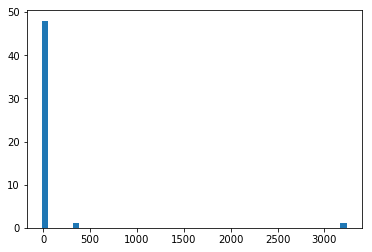

In [106]:
import matplotlib.pyplot as plt
N_atoms = 7
N_attempts = 50
V = ground_state_potential(N_atoms,N_attempts)
plt.hist(V,N_attempts)
plt.show()

In [91]:
positions = dist(7)
Total_Energy(positions)

-16.505384167507657

In [102]:
print(V)

[-7.7725251653713325, -9.000000000143105, -14.00131768125663, -5.000001369979357, -5.000071992643763, -6.320516651979443, -5.000019434805468, -5.314727582861316, -5.352188922122142, -2.860618526550194, -5.562211177184684, -13.000003708496804, -1.3758591837430147, -7.000013916078762, -11.00000017755808, -5.000044011814825, 277.6098494123368, -8.00000520308627, -8.365014611541719, -8.42853015916988, -6.489960298991198, -2.0001157822810094, -8.000000116983632, -5.000000190858426, -10.000000002905335, -16.00000000248644, -4.62139284484656, -5.343929189637641, -9.000000367275833, -8.000000225871466, -5.153942735113659, -8.266175843660097, -9.000000006476721, -4.0068364394766425, -8.435837935551216, -9.00071229318286, -8.000014028363855, -9.619947129655841, -4.000017015647284, -11.000000071779814, -10.000000008523969, -8.000000000586466, -7.2888423569425616, -8.317094054616835, -10.000000023114943, -4.404967142005026, -8.999999999968951, -5.605391934362535, -10.000000009052838, -4.3327132134